In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQk1zbM54uPxRwviZdHoDRxpYyX25vXFgukauGit38NAVZj63Z-T2qJA795kGBOB9GUw_i1ZS6dfJ8g/pub?output=csv')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


- En una primera observación: si bien las correlaciones son bajas, `edad` es la variable que más correlaciona con stroke.

- Seguida por `avg_glucose_level`.

- No consideramos `heart_disease` ni `hypertension`, porque si bien aparecen como numéricas y figuran en el corr, no dejan de ser categóricas.

#### Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


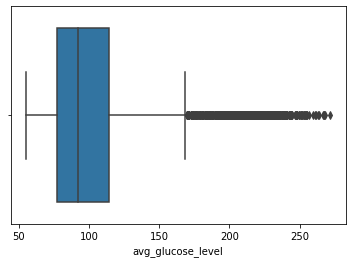

In [ ]:
sns.boxplot(data['avg_glucose_level'])

Estos valores son aceptables médicamente, pero en el contexto de nuestra muestra, los valores de la glucosa de algunos casos pueden parecer outliers. Si bien parecen outliers en el boxplot de nuestra muestra, en términos poblaciones no son valores fuera de un rango conocido o posible.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


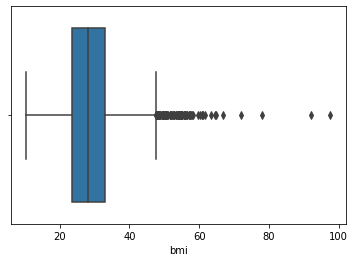

In [ ]:
sns.boxplot(data['bmi'])

A El NATIONAL HEART, LUNG, AND BLOOD INSTITUTE del gobierno estadounidence, afirma que la tabla de BMI va de 19 a 57, siendo el mínimo para una persona de 147cm y 41kg (no podríamos incluir a niños menores que la preadolescencia en este índice) y máximo una persona de casi dos metros y 200kg, así que se decidió tomar a los valores más extremos (sobre todo superiores) como outliers.

In [ ]:
data_bmi=data[(data['bmi'] > 57)]
data_bmi['stroke'].value_counts()

0    21
Name: stroke, dtype: int64

Eliminamos los 21 casos que exceden el valor 57 de BMI

In [ ]:
data2=data #para los gráficos
data.loc[(data['bmi'] <= 10) | (data['bmi']  >= 57),'bmi']=-1
data=data[(data['bmi'] != -1)]
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Correlación entre las variables

In [ ]:

data2["stroke"] = data2["stroke"].astype(str)
data2.loc[(data2['stroke'] == "1"),'stroke']="Si"
data2.loc[(data2['stroke'] == "0"),'stroke']="No"
data2.loc[(data2['heart_disease'] == "1"),'heart_disease']="Si"
data2.loc[(data2['heart_disease'] == "0"),'heart_disease']="No"
data2.loc[(data2['ever_married'] == "1"),'ever_married']="Si"
data2.loc[(data2['ever_married'] == "0"),'ever_married']="No"
data2 = data2.dropna() #temporalmente para los gráficos

In [ ]:
df_out = data2.groupby('stroke')[['bmi', 'age','avg_glucose_level']].agg(['mean'])
df_out.columns = df_out.columns.map('_'.join)
print(df_out.T.rename(columns={"Si":'Stroke', "No":'No Stroke'}))

stroke                   No Stroke      Stroke
bmi_mean                 28.527915   30.471292
age_mean                 41.760451   67.712919
avg_glucose_level_mean  104.003736  134.571388


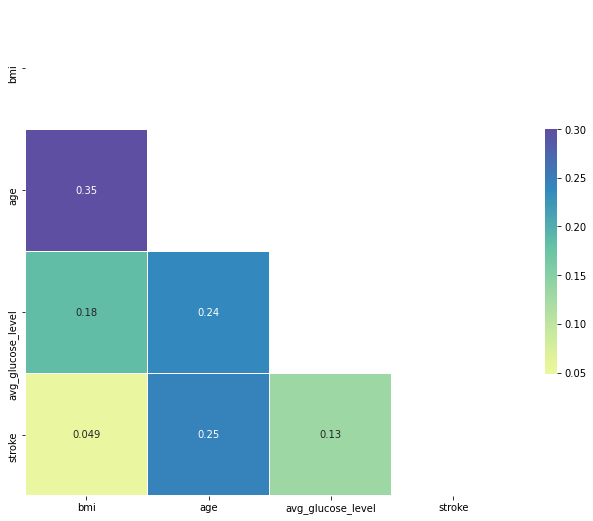

In [ ]:
corr = data[['bmi', 'age','avg_glucose_level','stroke']].corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,  vmax=.3, center=0, cmap="Spectral", mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)


<Figure size 1440x360 with 0 Axes>

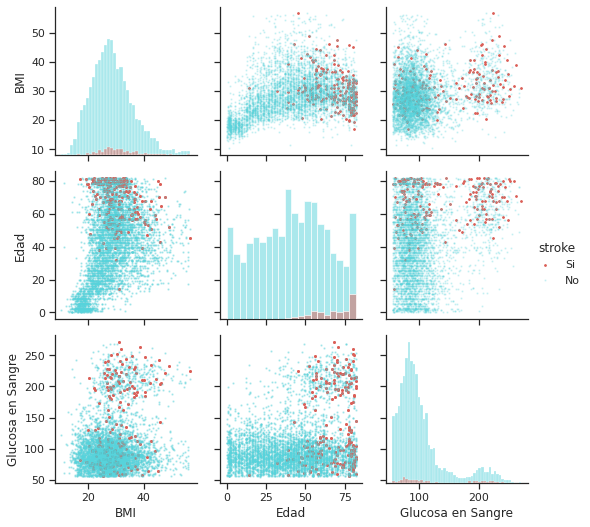

In [ ]:
import seaborn as sns
import numpy as np

import seaborn as sns; sns.set(style="ticks", color_codes=True)

plt.figure(figsize=(20,5))
data2.loc[(data2['bmi'] <= 10) | (data['bmi']  >= 57),'bmi']= np.nan
data2=data2.dropna()


g = sns.PairGrid(data2[['bmi', 'age','avg_glucose_level','stroke']], hue='stroke', palette="hls", hue_kws={"alpha": [1,0.2],'s':[3,1.5]})
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
g = g.map_diag(sns.histplot)
g = g.map_lower(plt.scatter)


replacements = {'bmi': "BMI", 'age': 'Edad',
                'avg_glucose_level': 'Glucosa en Sangre', 'stroke': 'Derrame'}
for i in range(3):
    for j in range(3):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])




Text(0, 0.5, 'Porcentaje')

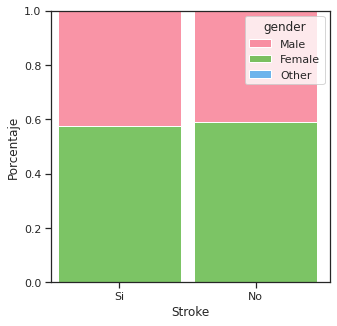

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=data2,x='stroke',
              hue='gender',
              multiple='fill', palette="husl",
              shrink=0.9)


plt.xlabel("Stroke")
plt.ylabel("Porcentaje")



Text(0, 0.5, 'Porcentaje')

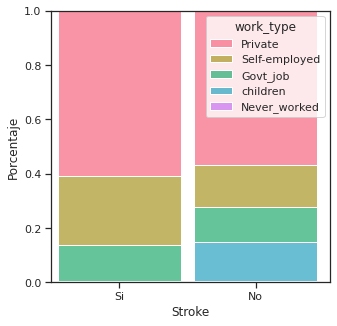

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=data2,x='stroke',
              hue='work_type',
              multiple='fill',palette="husl",
              shrink=0.9)
plt.xlabel("Stroke")
plt.ylabel("Porcentaje")


Text(0, 0.5, 'Porcentaje')

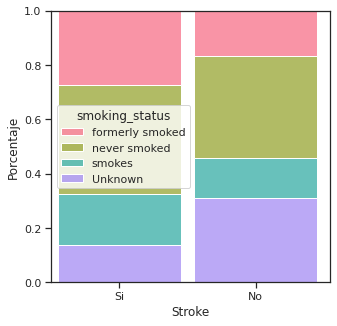

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=data2,x='stroke',
              hue='smoking_status',
              multiple='fill',palette="husl",
              shrink=0.9)
plt.xlabel("Stroke")
plt.ylabel("Porcentaje")


Text(0, 0.5, 'Porcentaje')

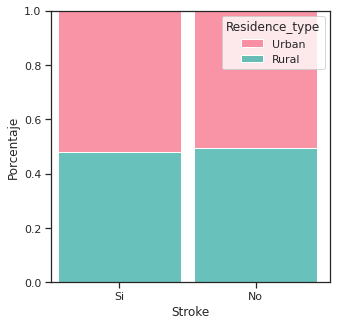

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=data2,x='stroke',
              hue='Residence_type',
              multiple='fill',palette="husl",
              shrink=0.9)
plt.xlabel("Stroke")
plt.ylabel("Porcentaje")


Text(0, 0.5, 'Porcentaje')

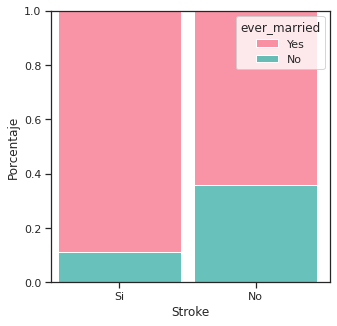

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=data2,x='stroke',
              hue='ever_married',
              multiple='fill',palette="husl",
              shrink=0.9)
plt.xlabel("Stroke")
plt.ylabel("Porcentaje")


Text(0, 0.5, 'Porcentaje')

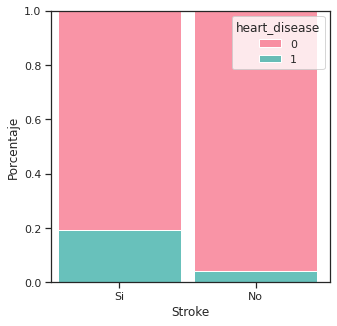

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=data2,x='stroke',
              hue='heart_disease',
              multiple='fill',palette="husl",
              shrink=0.9)
plt.xlabel("Stroke")
plt.ylabel("Porcentaje")


Text(0, 0.5, 'Porcentaje')

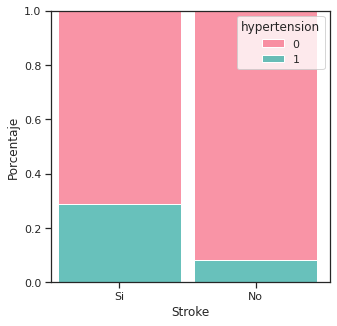

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=data2,x='stroke',
              hue='hypertension',
              multiple='fill',palette="husl",
              shrink=0.9)
plt.xlabel("Stroke")
plt.ylabel("Porcentaje")


**BINARIAS**: ever_married, Residence_type

Estas se reemplazan por 1 y 0


**CATEGORICAS**: gender, work_type, smoking_status

Estas se hacen dummies

### Get Dummies para categóricas

In [ ]:
categorical_cols = ['gender',"work_type",'smoking_status']
data = pd.get_dummies(data, columns = categorical_cols)
data

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,Yes,Urban,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,Yes,Rural,202.21,NaN,1,1,0,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,Yes,Rural,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,Yes,Urban,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,Yes,Rural,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Yes,Urban,83.75,NaN,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,44873,81.0,0,0,Yes,Urban,125.20,40.0,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,19723,35.0,0,0,Yes,Rural,82.99,30.6,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,Yes,Rural,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0


### Label Encoder para binarias

In [ ]:
data['ever_married'].value_counts()

Yes    3335
No     1754
Name: ever_married, dtype: int64

In [ ]:
data['Residence_type'].value_counts()

Urban    2587
Rural    2502
Name: Residence_type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
le = LabelEncoder()
le_married = le.fit_transform(data['ever_married'])
le_residente = le.fit_transform(data['Residence_type'])

In [ ]:
data['ever_married']=le_married
data['Residence_type']=le_residente

In [ ]:
data.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,NaN,1,1,0,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
data['ever_married'].value_counts()

1    3335
0    1754
Name: ever_married, dtype: int64

In [ ]:
data['Residence_type'].value_counts()

1    2587
0    2502
Name: Residence_type, dtype: int64

In [ ]:
data.corr()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000000,0.003620,0.002739,-0.001176,0.013210,-0.000609,0.002388,-0.000159,0.006526,-0.003216,0.002845,0.013032,-0.000179,0.005510,0.024094,-0.020474,-0.013781,-0.019607,0.008078,0.012204,0.000150
age,0.003620,1.000000,0.279303,0.264007,0.679413,0.014213,0.237589,0.352906,0.245451,0.028016,-0.027714,-0.010665,0.129713,-0.078701,0.117444,0.328330,-0.634808,-0.379241,0.237172,0.120093,0.072897
hypertension,0.002739,0.279303,1.000000,0.109819,0.166967,-0.004793,0.175711,0.155987,0.129504,-0.022448,0.022580,-0.004581,0.017497,-0.021532,-0.007493,0.118155,-0.129095,-0.141260,0.060777,0.065655,0.028121
heart_disease,-0.001176,0.264007,0.109819,1.000000,0.115246,0.002942,0.162542,0.048343,0.134721,-0.085733,0.085834,-0.003357,0.001234,-0.015779,0.000501,0.086715,-0.092063,-0.066998,0.066390,-0.021502,0.044261
ever_married,0.013210,0.679413,0.166967,0.115246,1.000000,0.006325,0.154159,0.353834,0.108908,0.030592,-0.030044,-0.019331,0.134277,-0.090859,0.153970,0.193258,-0.544736,-0.332676,0.172386,0.101916,0.105957
Residence_type,-0.000609,0.014213,-0.004793,0.002942,0.006325,1.000000,-0.003655,0.004512,0.015343,0.006866,-0.006461,-0.014255,0.012946,0.022864,-0.017701,0.010361,-0.002574,-0.002013,0.007372,-0.025002,0.028233
avg_glucose_level,0.002388,0.237589,0.175711,0.162542,0.154159,-0.003655,1.000000,0.183755,0.132528,-0.054562,0.054237,0.011533,0.011685,-0.014661,0.018376,0.062361,-0.102242,-0.094407,0.068722,0.022899,0.017336
bmi,-0.000159,0.352906,0.155987,0.048343,0.353834,0.004512,0.183755,1.000000,0.049052,0.028760,-0.028409,-0.012139,0.087313,-0.028741,0.208371,0.080848,-0.464651,-0.283594,0.122289,0.106756,0.090918
stroke,0.006526,0.245451,0.129504,0.134721,0.108908,0.015343,0.132528,0.049052,1.000000,-0.008983,0.009074,-0.003180,0.002588,-0.014946,0.012359,0.062095,-0.084273,-0.056129,0.064163,-0.003749,0.009056
gender_Female,-0.003216,0.028016,-0.022448,-0.085733,0.030592,0.006866,-0.054562,0.028760,-0.008983,1.000000,-0.999595,-0.016671,0.017057,-0.011474,0.031093,0.027626,-0.089219,-0.060367,-0.043582,0.101452,-0.013068


## Imputaciones

Vamos a dividir el dataframe por género, con atención al único caso no binario.
Después, vamos a usar los cuartiles para volver a dividir el cada data set en 4.
Usaremos la media de cada uno y después unimos todo con '*concat*'

In [ ]:
data.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,NaN,1,1,0,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
data_h = data[data['gender_Male']==1]
data_m = data[data['gender_Female']==1]
data_o = data[data['gender_Other']== 1]
data_o

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3116,56156,26.0,0,0,0,0,143.33,22.4,0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
print("Cuartiles generales")
print(np.percentile(data['age'], 25))
print(np.percentile(data['age'], 50))
print(np.percentile(data['age'], 75))
print(np.max(data['age']))
#H
print("Cuartiles hombres")
print(np.percentile(data_h['age'], 25))
print(np.percentile(data_h['age'], 50))
print(np.percentile(data_h['age'], 75))
print(np.max(data_h['age']))
#M
print("Cuartiles mujeres")
print(np.percentile(data_m['age'], 25))
print(np.percentile(data_m['age'], 50))
print(np.percentile(data_m['age'], 75))
print(np.max(data_m['age']))

Cuartiles generales
25.0
45.0
61.0
82.0
Cuartiles hombres
22.0
46.0
61.0
82.0
Cuartiles mujeres
27.0
44.0
61.0
82.0


In [ ]:
data_h1 = data_h[data_h['age']<=22]
data_h2 = data_h[(data_h['age']>22) & (data_h['age']<=46)]  
data_h3 = data_h[(data_h['age']>46) & (data_h['age']<=61)]  
data_h4 = data_h[data_h['age']>61]

In [ ]:
data_m1 = data_m[data_m['age']<=27]
data_m2 = data_m[(data_m['age']>27) & (data_m['age']<=44)]  
data_m3 = data_m[(data_m['age']>44) & (data_m['age']<=61)]  
data_m4 = data_m[data_m['age']>61]

In [ ]:
data_m4.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

**Imputar cada uno por la media**

In [ ]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
data_imp = imputer.fit_transform(data_h1)
data_imp_h1 = pd.DataFrame(data_imp, columns = [data_h1.columns])

In [ ]:
data_imp_h1.columns

MultiIndex([(                            'id',),
            (                           'age',),
            (                  'hypertension',),
            (                 'heart_disease',),
            (                  'ever_married',),
            (                'Residence_type',),
            (             'avg_glucose_level',),
            (                           'bmi',),
            (                        'stroke',),
            (                 'gender_Female',),
            (                   'gender_Male',),
            (                  'gender_Other',),
            (            'work_type_Govt_job',),
            (        'work_type_Never_worked',),
            (             'work_type_Private',),
            (       'work_type_Self-employed',),
            (            'work_type_children',),
            (        'smoking_status_Unknown',),
            ('smoking_status_formerly smoked',),
            (   'smoking_status_never smoked',),
            (       

In [ ]:
data_imp = imputer.fit_transform(data_h2)
data_imp_h2 = pd.DataFrame(data_imp, columns = [data_h2.columns])

In [ ]:
data_imp = imputer.fit_transform(data_h3)
data_imp_h3 = pd.DataFrame(data_imp, columns = [data_h3.columns])

In [ ]:
data_imp = imputer.fit_transform(data_h4)
data_imp_h4 = pd.DataFrame(data_imp, columns = [data_h4.columns])

In [ ]:
data_imp = imputer.fit_transform(data_m1)
data_imp_m1 = pd.DataFrame(data_imp, columns = [data_m1.columns])

In [ ]:
data_imp = imputer.fit_transform(data_m2)
data_imp_m2 = pd.DataFrame(data_imp, columns = [data_m2.columns])

In [ ]:
data_imp = imputer.fit_transform(data_m3)
data_imp_m3 = pd.DataFrame(data_imp, columns = [data_m3.columns])

In [ ]:
data_imp = imputer.fit_transform(data_m4)
data_imp_m4 = pd.DataFrame(data_imp, columns = [data_m4.columns])

In [ ]:
data_imp = imputer.fit_transform(data_o)
data_imp_o = pd.DataFrame(data_imp, columns = [data_o.columns])

In [ ]:
data_fin = pd.concat([data_imp_h1, data_imp_h2, data_imp_h3, data_imp_h4, 
                      data_imp_m1, data_imp_m2, data_imp_m3,data_imp_m4, data_imp_o],ignore_index=True)

In [ ]:
data_fin.isna().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [ ]:
data_fin.columns

MultiIndex([(                            'id',),
            (                           'age',),
            (                  'hypertension',),
            (                 'heart_disease',),
            (                  'ever_married',),
            (                'Residence_type',),
            (             'avg_glucose_level',),
            (                           'bmi',),
            (                        'stroke',),
            (                 'gender_Female',),
            (                   'gender_Male',),
            (                  'gender_Other',),
            (            'work_type_Govt_job',),
            (        'work_type_Never_worked',),
            (             'work_type_Private',),
            (       'work_type_Self-employed',),
            (            'work_type_children',),
            (        'smoking_status_Unknown',),
            ('smoking_status_formerly smoked',),
            (   'smoking_status_never smoked',),
            (       

In [ ]:
data_fin.columns = ["_".join(a) for a in data_fin.columns.to_flat_index()]
data_fin.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [ ]:
data_fin['stroke'].value_counts()

0.0    4840
1.0     249
Name: stroke, dtype: int64

## ARBOL

#### Train test y val split

In [ ]:
data_fin=data_fin.drop(columns=['id'],axis=1) #eliminamos la columna id por irrelevante y porque puede confudir al modelo si la evalúa como numérica
data_fin

KeyError: ignored

**EJERCICIO G**

g) Implementar el algoritmo introducido en el punto d) utilizando árboles de decisión. En primer lugar, se deberá separar un 20% de los datos para usarlos como conjunto de evaluación (test set). El conjunto restante (80%) es el de desarrollo y es con el que se deberá continuar haciendo el trabajo.

Primero hice un árbol al azar simplemente para probar. 

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, fbeta_score
from sklearn.model_selection import train_test_split

In [ ]:
X = data_fin.drop('stroke', axis=1)
y = data_fin['stroke']
y.value_counts()

0.0    4840
1.0     249
Name: stroke, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=50,stratify=y.values)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2, stratify=y_train)

for split_name, split in zip(['Entrenamiento','Validación','Prueba'],[y_train,y_val, y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[0]))

Entrenamiento: 0.951
Validación: 0.951
Prueba: 0.951


In [ ]:
print('Entrenamiento: {}'.format(len(x_train)))
print('Validacion: {}'.format(len(x_val)))
print('Prueba: {}'.format(len(x_test)))

Entrenamiento: 3256
Validacion: 815
Prueba: 1018


In [204]:
arbol_sklearn = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1, ccp_alpha=0, class_weight='balanced')
arbol_sklearn.fit(x_train,y_train)
y_pred_test = arbol_sklearn.predict(x_test)
y_pred_train = arbol_sklearn.predict(x_train)

print('Train f1: {}'.format(f1_score(y_train,y_pred_train)))
print('Test f1: {}'.format(f1_score(y_test,y_pred_test)))
print('Train rec: {}'.format(recall_score(y_train,y_pred_train)))
print('Test rec: {}'.format(recall_score(y_test,y_pred_test)))
print('Train acc: {}'.format(accuracy_score(y_train,y_pred_train)))
print('Test acc: {}'.format(accuracy_score(y_test,y_pred_test)))
print('Train f2: {}'.format(fbeta_score(y_train,y_pred_train, beta=2)))
print('Test f2: {}'.format(fbeta_score(y_test,y_pred_test, beta=2)))

Train f1: 0.2687140115163148
Test f1: 0.21875
Train rec: 0.8805031446540881
Test rec: 0.7
Train acc: 0.765970515970516
Test acc: 0.7544204322200393
Train f2: 0.4608294930875576
Test f2: 0.37234042553191493


Malísimas las diferencias entre train y test. La más preocupante es la diferencia en recall, la medida que más nos interesa.

**Ahora sí el G 1**

1) Armar conjuntos de entrenamiento y validación con proporción 80-20 del conjunto de desarrollo de forma aleatoria. Usar 50 semillas distintas y realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en c) en esas 50 particiones distintas.

In [ ]:
n_seeds = 50
recall = []
f2s= []

for seed in range(n_seeds):
    x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed,stratify=y_train)
    arbol_sklearn = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, ccp_alpha=0.00, class_weight='balanced')
    arbol_sklearn.fit(x_train_,y_train_)
    
    y_pred_val = arbol_sklearn.predict(x_val)
    f2s.append(fbeta_score(y_val,y_pred_val, beta=2))
    f2s.append(fbeta_score(y_val,y_pred_val, beta=2))

In [ ]:
sns.boxplot(f2s)

In [ ]:
print(np.percentile(f2s, 50))
print(np.percentile(f2s, 75))
print(np.percentile(f2s, 100))

In [ ]:
arbol_sklearn.get_params

**Ahora G 2**

2) Usar validación cruzada de 50 iteraciones (50-fold cross validation). Realizar un gráfico de caja y bigotes que muestre cómo varía la métrica elegida en esas 50 particiones distintas.

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

kfoldcv = StratifiedKFold(n_splits=50)
ftwo_scorer = make_scorer(fbeta_score, beta=2)
parametro = [{'max_depth' : np.arange(1,11)}]
dectre = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=42)
grid_cv=GridSearchCV(dectre, param_grid = parametro, cv= kfoldcv, scoring=ftwo_scorer)
grid_cv.fit(x_train, y_train)

In [ ]:
mejor_arbol_grid = grid_cv.best_estimator_
mejor_arbol_grid

In [ ]:
pd.DataFrame(grid_cv.cv_results_)

In [ ]:
grid_10 = pd.DataFrame(grid_cv.cv_results_).iloc[9]
grid_10

In [ ]:
grid_10 = grid_10[7:56]
sns.boxplot(grid_10)

In [ ]:
print(np.percentile(grid_10, 50))
print(np.percentile(grid_10, 75))
print(np.percentile(grid_10, 100))

El boxplot es sobre el **árbol de profundidad 10** no porque haya sido el mejor, si no porque para comparar con el árbol que tenía los mismos parámetros para el modelo de validación. 
La mediana da peor, pero sí resulta que el mejor caso tiene mejor rendimiento que el otro.

*Sería bueno poder hacer los dos juntos, no me está saliendo. También habría que considerar evaluar sobre recall. Es una decisión teórica.*

**Ejercicio H**

h) Graficar el árbol de decisión con mejor performance encontrado en el punto g2). Analizar el árbol de decisión armado (atributos elegidos y decisiones evaluadas).

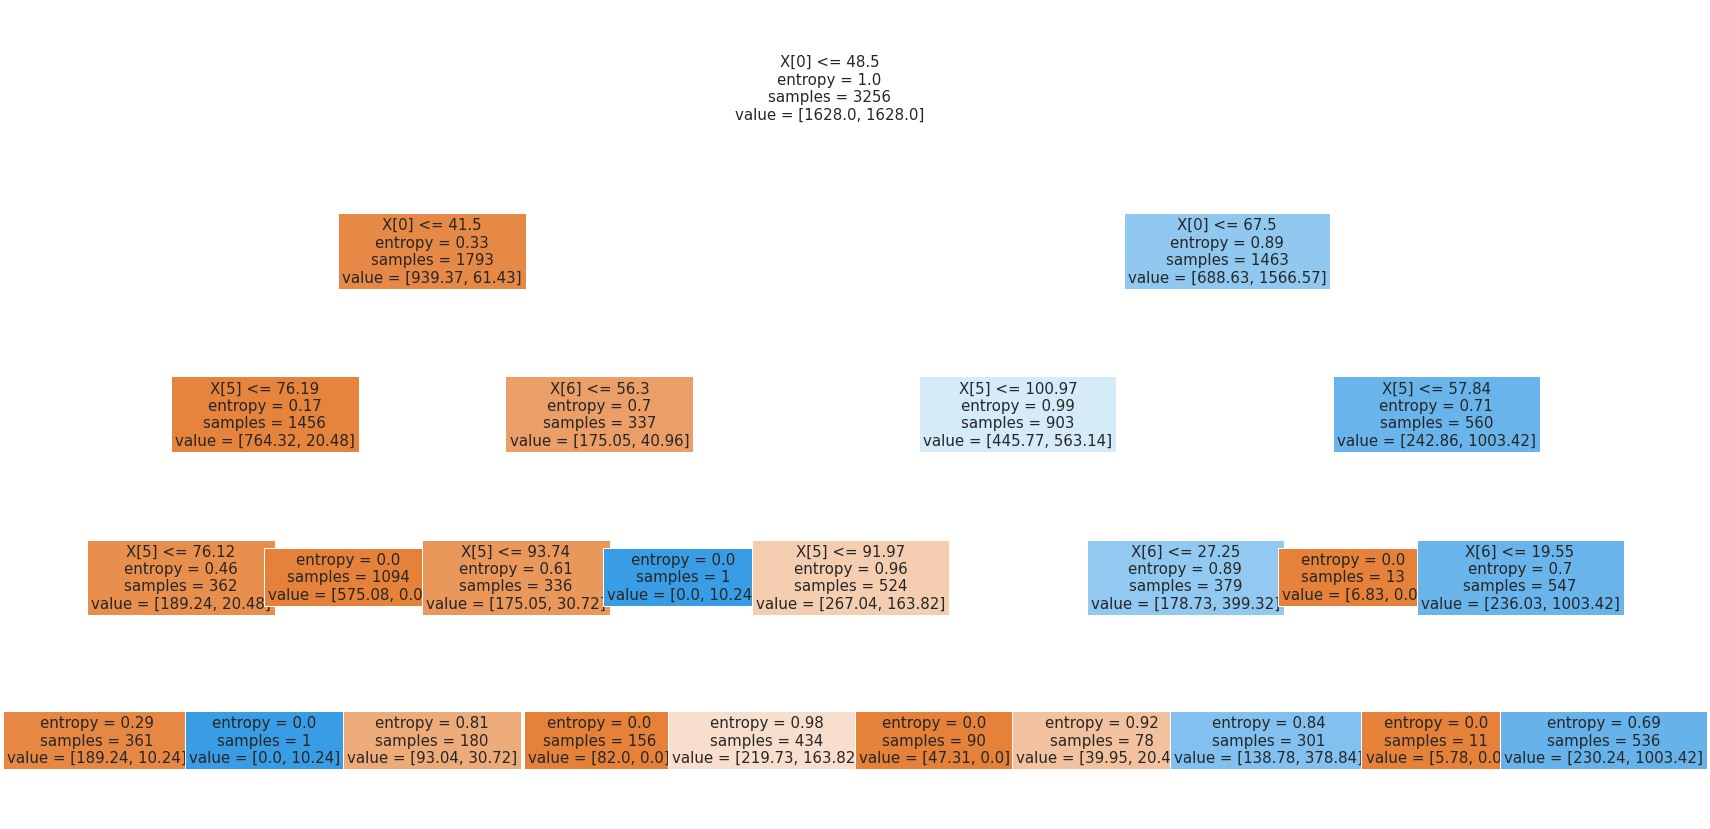

In [203]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,15))

plot_tree(grid_cv.best_estimator_,filled=True,proportion=False,fontsize=15,precision=2)
plt.savefig('tree_high_dpi', dpi=200)

In [ ]:
X.head(2)

No parece haber quedado con tanta profundidad; posiblemente porque lo limitamos desde el inicio. Seguramente, si hubiesemos hecho un random search hubiese arrojado una profundidad de más de 20. 

`Edad` y `bmi` parecen ser los predictores más importantes. En un segundo nivel también aparece `avg_glucose_level`.

**Ejercicio I**

i) Usando validación cruzada de 10 iteraciones (10-fold cross validation), probar distintos valores de α del algoritmo de poda mínima de complejidad de costos (algoritmo de poda de sklearn). Hacer gráficos de la performance en validación y entrenamiento en función del α. Explicar cómo varía la profundidad de los árboles al realizar la poda con distintos valores de α.

In [ ]:
depths = np.arange(1,11)
params_grid = {'max_depth':depths,
    'ccp_alpha':np.linspace(0,0.5,20)}  
    
kfoldcv = StratifiedKFold(n_splits=10)
base_tree = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
ftwo_scorer = make_scorer(fbeta_score, beta=2)
arbol_alpha = RandomizedSearchCV(estimator=base_tree,param_distributions = params_grid,scoring=ftwo_scorer,cv=kfoldcv,n_iter=10) 
arbol_alpha.fit(x_train,y_train)

In [ ]:
pd.DataFrame(arbol_alpha.cv_results_)


In [ ]:
mejor_arbol_alpha = arbol_alpha.best_estimator_
mejor_arbol_alpha

#### Cost complexity prunning

Recurrimos a la documentación de **sklearn** para tener una mejor comprensión del funcionamiento de la poda en nuestro modelo. 

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha efectivo")
ax.set_ylabel("Impureza total de las hojas")
ax.set_title("Impureza total vs alpha efectivo para training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Número de nodos")
ax[0].set_title("Número de nodos frente a alfa")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Profundidad del árbol")
ax[1].set_title("Profundidad frente a alpha")
fig.tight_layout()

In [ ]:
train_scores = [clf.score (x_train, y_train) for clf in clfs] 
val_scores = [clf.score (x_val, y_val)  for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]
fig, ax = plt.subplots () 
ax.set_xlabel ("alpha") 
ax.set_ylabel ("accuracy") 
ax.set_title ("Accuracy vs alpha para conjuntos de entrenamiento y validación") 
ax.plot (ccp_alphas, train_scores, marker = 'o', label = "train", 
        drawstyle = "steps-post") 
ax.plot (ccp_alphas, val_scores, marker = 'o', label = "val", 
        drawstyle = "steps-post") 
ax.plot (ccp_alphas, test_scores, marker = 'o', label = "test", 
        drawstyle = "steps-post") 
ax.legend ( ) 
plt.show ()

Si bien los resultados son sobre accuracy, puede verse el fuerte efecto de la poda en las diferencias de rendimientos cuando se predice sobre un data set y otro. 

**EJERCICIO J**

j) Evaluar en el conjunto de evaluación, el árbol correspondiente al α que maximice la performance en el conjunto de validación. Comparar con el caso sin poda (α=0)

In [ ]:
pred_arbol_grid = mejor_arbol_grid.predict(x_test)
pred_arbol_alpha = mejor_arbol_alpha.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm_grid = confusion_matrix(y_test,pred_arbol_grid)
sns.heatmap(cm_grid, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print('Recall del árbol sin podar: {}'.format(recall_score(y_test,pred_arbol_grid)))
print('F2 del árbol sin podar: {}'.format(fbeta_score(y_test,pred_arbol_grid, beta=2)))
print('Accuracy del árbol sin podar: {}'.format(accuracy_score(y_test,pred_arbol_grid)))

In [ ]:
cm_alpha = confusion_matrix(y_test,pred_arbol_alpha)
sns.heatmap(cm_alpha, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print('Recall del árbol podado: {}'.format(recall_score(y_test,pred_arbol_alpha)))
print('F2 del árbol podado: {}'.format(fbeta_score(y_test,pred_arbol_alpha, beta=2)))
print('Accuracy del árbol podado: {}'.format(accuracy_score(y_test,pred_arbol_alpha)))

El árbol recortado estuvo bastante mejor. Hay 1 solo caso en el que no pudo preveer bien la lesión. 
Pero en términos generales, es un desastre por la cantidad de gente que alerta, los **falsos positivos** están disparados. 
Igual, como en nuestro caso importa más detectarlos, esta bién.
De los 32 casos que sí tuvieron lesiones, reconoció a 31. Está bastante bien, es lo que más nos interesa, la **sensibilidad** o recall es muy buena. 

**EJERCICIO K**

k) Para el árbol sin poda, obtener la importancia de los descriptores usando la técnica de eliminación recursiva. Reentrenar el árbol usando sólo los 3 descriptores más importantes. Comparar la performance en el conjunto de prueba.

In [ ]:
feat_arbol = mejor_arbol_grid.feature_importances_
feat_arbol

array([0.79676294, 0.        , 0.        , 0.        , 0.        ,
       0.09038984, 0.11284721, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
features=X.columns
type(features)

In [ ]:
for feat_imp,feat in reversed(sorted(zip(feat_arbol,features))):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

Para la selección de las features a usar, utilizaremos **RFE**

In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(mejor_arbol_grid, n_features_to_select=3, step=1)
selector = selector.fit(x_train, y_train)

In [ ]:
selector.support_  #son los que se quedó, coincide con el orden de features importance

In [ ]:
pred_selector = selector.predict(x_test)
cm_sel = confusion_matrix(y_test,pred_selector)
sns.heatmap(cm_sel, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')



In [ ]:

print('Recall del árbol sin podar: {}'.format(recall_score(y_test,pred_selector)))
print('F2 del árbol sin podar: {}'.format(fbeta_score(y_test,pred_selector, beta=2)))
print('Accuracy del árbol sin podar: {}'.format(accuracy_score(y_test,pred_selector)))

**Hacemos una prueba comparativo sobre el set de validación, para chequear diferencias**

In [ ]:
selector_t = RFE(mejor_arbol_grid, n_features_to_select=3, step=1)
selector_t = selector.fit(x_train, y_train)
pred_selector_t = selector_t.predict(x_val)
cm_sel = confusion_matrix(y_val,pred_selector_t)
sns.heatmap(cm_sel, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')



In [ ]:
print('Recall del árbol sin podar: {}'.format(recall_score(y_val,pred_selector_t)))
print('F2 del árbol sin podar: {}'.format(fbeta_score(y_val,pred_selector_t, beta=2)))
print('Accuracy del árbol sin podar: {}'.format(accuracy_score(y_val,pred_selector_t)))


Dos conclusiones:



*   Hay una diferencia importante entre las métricas sobre el conjunto de validación y el de prueba, una señal del sobreajuste del modelo. 
*   Por otro lado, no mejoran los resultados cuando se toman 3 predictoras o todo el dataset, si se prueba sobre validación. 




